##### Методы и алгоритмы компьютерного зрения
---

### Методы кластеризации в Python

#### 1. Метод k-means

In [1]:
from sklearn.datasets.samples_generator import make_blobs

In [2]:
import numpy as np                                   # Массивы
import matplotlib.pyplot as plt                      # Графики
%matplotlib inline

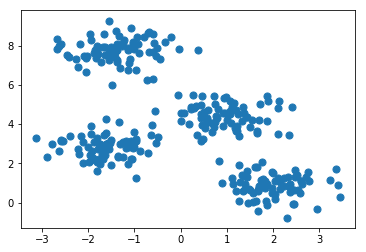

In [3]:
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

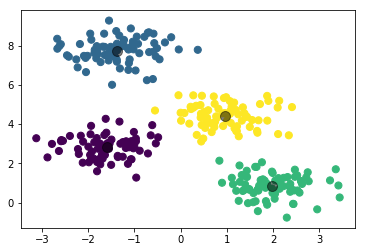

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

### 1.1. Распознавание рукописных цифр методом k-means

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [6]:
kmeans = KMeans(n_clusters = 10)
clusters = kmeans.fit_predict(digits.data)
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

##### Центры кластеров

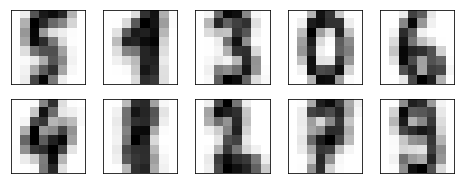

In [7]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

##### Ошибка

In [8]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target, labels))

0.7946577629382304


##### Пример

Пусть задана выборка $\mathrm{x}_1=(1,1)^T$, $\mathrm{x}_2=(0,0)^T$, $\mathrm{x}_3=(2,1)^T$, $\mathrm{x}_4=(4,4)^T$, $\mathrm{x}_5=(5,5)^T$, $\mathrm{x}_6=(5,3)^T$. Найти кластеризацию этих образов по двум классам методом $k$-means.

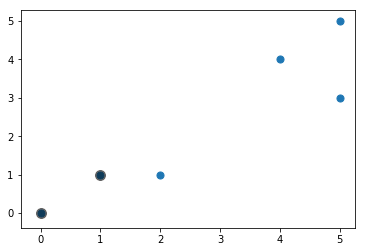

In [9]:
X = np.array([[1, 1], [0, 0], [2, 1], [4, 4], [5, 5], [5, 3]])
centers = np.array([[1, 1], [0, 0]])
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

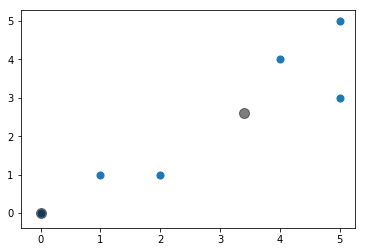

In [10]:
centers = np.array([[17./5., 13./5.], [0, 0]])
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

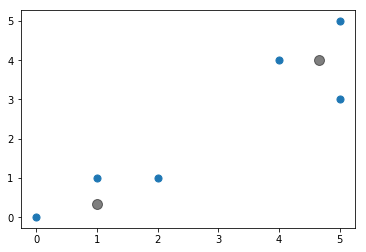

In [11]:
centers = np.array([[14./3., 4], [1, 1./3.]])
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 100, alpha = 0.5)

#### 1.2. EM-алгоритм

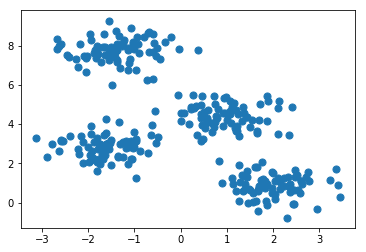

In [3]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np                                   # Массивы
import matplotlib.pyplot as plt                      # Графики
%matplotlib inline

X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

In [13]:
rnd = np.random.RandomState(13)
X_stretched = np.dot(X, rnd.randn(2, 2))

In [16]:
rnd.randn(2, 2)

array([[1.34510171, 0.53233789],
       [1.3501879 , 0.86121137]])

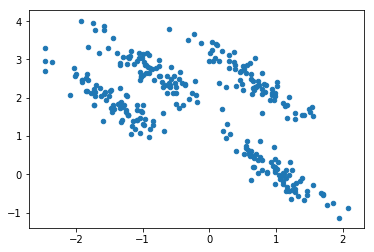

In [35]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s = 20)

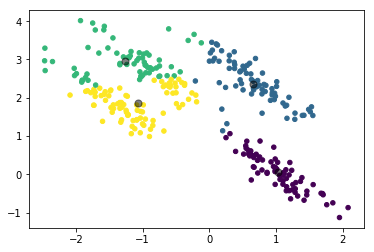

In [34]:
from sklearn.cluster import KMeans # Для сравнения методом к-средних
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_stretched)
y_kmeans = kmeans.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c = y_kmeans, s = 20, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 50, alpha = 0.5)

In [17]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

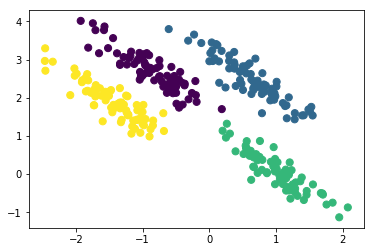

In [33]:
from sklearn.mixture import gaussian_mixture
gmm = gaussian_mixture.GaussianMixture(n_components = 4) # ЕМ-алгоритм
gmm.fit(X_stretched)
labels = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c = labels, s = 50, cmap = 'viridis')

### Сегментация изображений. Задание.

Пусть дано цветное изображение. В качестве вектор-признака пикселя примем вектор (r, g, b). Используя методы кластеризации, разбить полученное множество векторов на кластеры -- сегменты.

In [1]:
from PIL import Image                 # для работы с изображениями 

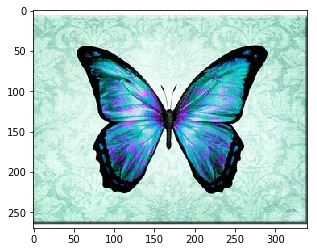

In [23]:
# открываем картинку и преобразуем в монохромное
im = np.array(Image.open('segment.jpg'))
fig = plt.figure()
plt.imshow(im)

In [24]:
m, n, s = im.shape

In [25]:
im = im.reshape((m * n, s)) # Здесь векторы-признаки пикселей
im.shape

(91800, 3)

In [12]:
im = im.reshape((m * n, s))
im.shape

(91800, 3)

In [26]:
from sklearn.cluster import KMeans
n_clusters = 3
'''
метод к-средних...
'''

In [27]:
im[:, 0] = (y_kmeans[:] / n_clusters) * 255
im[:, 1] = (y_kmeans[:] / n_clusters) * 255
im[:, 2] = (y_kmeans[:] / n_clusters) * 255

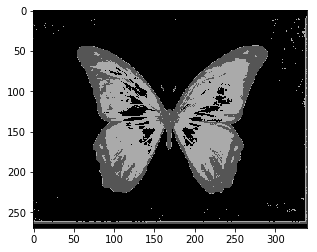

In [28]:
''' Сегментация методом к-средних '''
im = im.reshape((m, n, s))
fig = plt.figure()
plt.imshow(im)

In [21]:
'''
ЕМ-алгоритм
'''

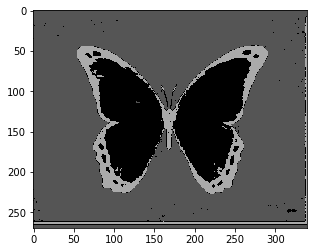

In [22]:
''' Сегментация с помощью ЕМ-алгоритма'''

im = im.reshape((m, n, s))
fig = plt.figure()
plt.imshow(im)